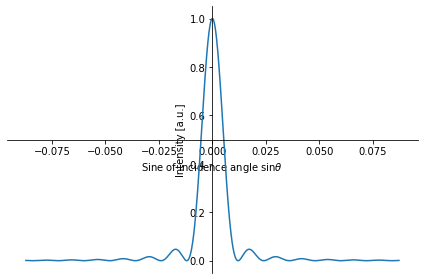

In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Model input parameters:
w = 0.6 # light wavelength [micron]
a = 50 # slit width [micron]
d = 250 # slit spacing [micron]
N = 1 # number of slits

if N > 1 and d < a:
    raise ValueError("Invalid parameters: slit spacing must be larger than slit width")

# model diffraction up to this angle [radians]
max_angle = np.deg2rad(5)
# theta - angle of incidence
theta = np.linspace(-max_angle, max_angle, 10000)
#theta = np.linspace(-np.pi/50, np.pi/50, 10000)

def slit_intensity(a, w, theta):
    """
    Return the normalised intensity of Fraunhofer diffraction on a slit.
    a: slit width [micron]
    w: light wavelength [micron]
    theta: angle between the direction of light and the normal to the slit plane.
    """
    # diffraction pattern from one slit
    alpha = np.pi * a / w * np.sin(theta)
    # 
    I = (np.sin(alpha) / alpha)**2
    # treat singularity at alpha == 0 specially:
    ii = abs(alpha) < 1e-5
    if any(ii):
        I[ii] = 1.0
    return I

def grating_interference(d, N, w, theta):
    """
    Return the normalised intensity of Fraunhofer diffraction on an array of delta-function slits.
    d: slit spacing, centre-to-centre [micron]
    N: number of slits
    w: light wavelength [micron]
    theta: angle between the direction of light and the normal to the slit plane.
    """
    # diffraction pattern from an array of slits
    beta = np.pi * d / w * np.sin(theta)
    I = (np.sin(N*beta) / N / np.sin(beta))**2
    # treat singularities at sin(beta) == 0 specially:
    ii = abs(np.sin(beta)) < 1e-5
    if any(ii):
        I[ii] = N**2
    return I

def grating_intensity(a, d, N, w, theta):
    """
    Return the normalised intensity of Fraunhofer diffraction on an array of slits.
    a: slit width [micron]
    d: slit spacing, centre-to-centre [micron]
    N: number of slits
    w: light wavelength [micron]
    theta: angle between the direction of light and the normal to the slit plane.
    """
    return slit_intensity(a, w, theta) * grating_interference(d, N, w, theta)
    
# Plot the interference pattern
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel(r'Sine of incidence angle $\sin\theta$')
if N > 1:
    ax.plot(np.sin(theta), slit_intensity(a, w, theta), '--', label='one slit')
    ax.plot(np.sin(theta), grating_interference(d, N, w, theta), ':', label='interference')
ax.plot(np.sin(theta), grating_intensity(a, d, N, w, theta), '-', label='full pattern')
if N > 1:
    ax.legend()
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

    
plt.tight_layout()
plt.show()